#### Compare PIDNET S, M, L ALL WITH WEIGHT DECAY:5e-4, cross entropy, optimizer SGD, lr:0.00625, batch size = 4
 t:0.5; lambda_0=0.4, lambda_1=0.6, lambda_2=1.0, lambda_3=0.1
 ##
 paper values:
 t: 0.8 lambda_0=0.4, lambda_1=20.0, lambda_2=1.0, lambda_3=1.0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the datasets
df_pidnet_s = pd.read_csv("pidnet_results/5_PIDNET_S_1ce_0.00625_totloss_100_percent.csv")
df_pidnet_m = pd.read_csv("pidnet_results/5_PIDNET_M_1ce_0.00625_totloss_100_percent.csv")  
df_pidnet_l= pd.read_csv("pidnet_results/5_PIDNET_L_1ce_0.00625_totloss_100_percent.csv")  
# values of paper
df_pidnet_s_paper = pd.read_csv("pidnet_results/5_PIDNET_S_1ce_0.00625_totloss_samepaper_100_percent.csv")
df_pidnet_m_paper = pd.read_csv("pidnet_results/5_PIDNET_M_1ce_0.00625_totloss_samepaper_100_percent.csv")  
df_pidnet_l_paper= pd.read_csv("pidnet_results/5_PIDNET_L_1ce_0.00625_totloss_samepaper_100_percent.csv")  


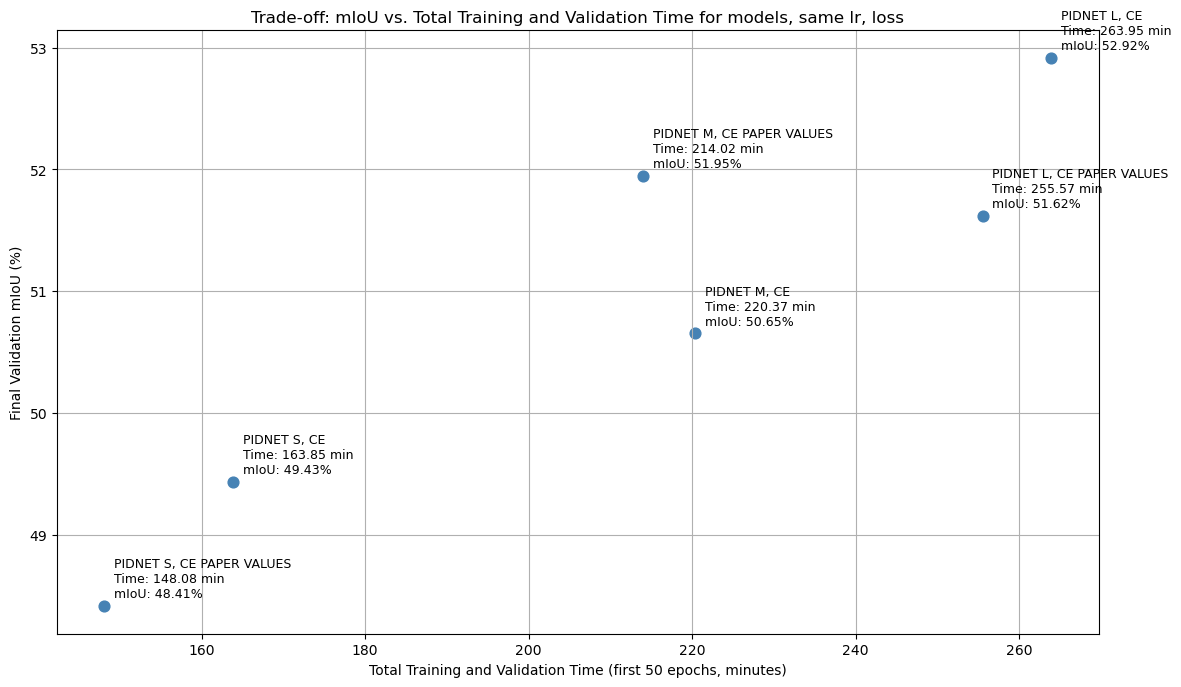

In [2]:

# Results container
results = []

def process_df(df, label):
    # Drop rows with missing key data and sort by epoch to get latest values reliably
    df_clean = df.dropna(subset=['epoch', 'val_mIoU', 'Runtime']).sort_values(by='epoch')
    
    if not df_clean.empty:
        # Total runtime in minutes
        total_runtime_sec = df_clean['Runtime'].sum()
        total_runtime_min = total_runtime_sec / 60

        # Final mIoU (at epoch 50, from val_mIoU_final)
        epoch_50_row = df[df['epoch'] == 50]
        if not epoch_50_row.empty and not pd.isna(epoch_50_row.iloc[0]['val_mIoU']):
            miou_epoch_50 = epoch_50_row.iloc[0]['val_mIoU']
        else:
            miou_epoch_50 = None  # or fallback to another value if needed

        # Save result
        results.append({
            'label': label,
            'miou': miou_epoch_50,
            'runtime': total_runtime_min
        })


        

# Process datasets
process_df(df_pidnet_s, 'PIDNET S, CE')
process_df(df_pidnet_m, 'PIDNET M, CE')
process_df(df_pidnet_l, 'PIDNET L, CE')
process_df(df_pidnet_s_paper, 'PIDNET S, CE PAPER VALUES')
process_df(df_pidnet_m_paper, 'PIDNET M, CE PAPER VALUES')
process_df(df_pidnet_l_paper, 'PIDNET L, CE PAPER VALUES')

# Extract data for plotting
runtimes = [r['runtime'] for r in results]
mious = [r['miou'] for r in results]
labels = [r['label'] for r in results]

# Plotting
plt.figure(figsize=(12, 7))
plt.scatter(runtimes, mious, color='steelblue', s=60)

offset_x = (max(runtimes) - min(runtimes)) * 0.01 if len(runtimes) > 1 else 0.5
offset_y = (max(mious) - min(mious)) * 0.01 if len(mious) > 1 else 0.05

for i, label in enumerate(labels):
    plt.text(runtimes[i] + offset_x, mious[i] + offset_y,
             f"{label}\nTime: {runtimes[i]:.2f} min\nmIoU: {mious[i]:.2f}%",
             fontsize=9, ha='left', va='bottom')

plt.xlabel('Total Training and Validation Time (first 50 epochs, minutes)')
plt.ylabel('Final Validation mIoU (%)')
plt.title('Trade-off: mIoU vs. Total Training and Validation Time for models, same lr, loss')
plt.grid(True)
plt.tight_layout()
plt.show()


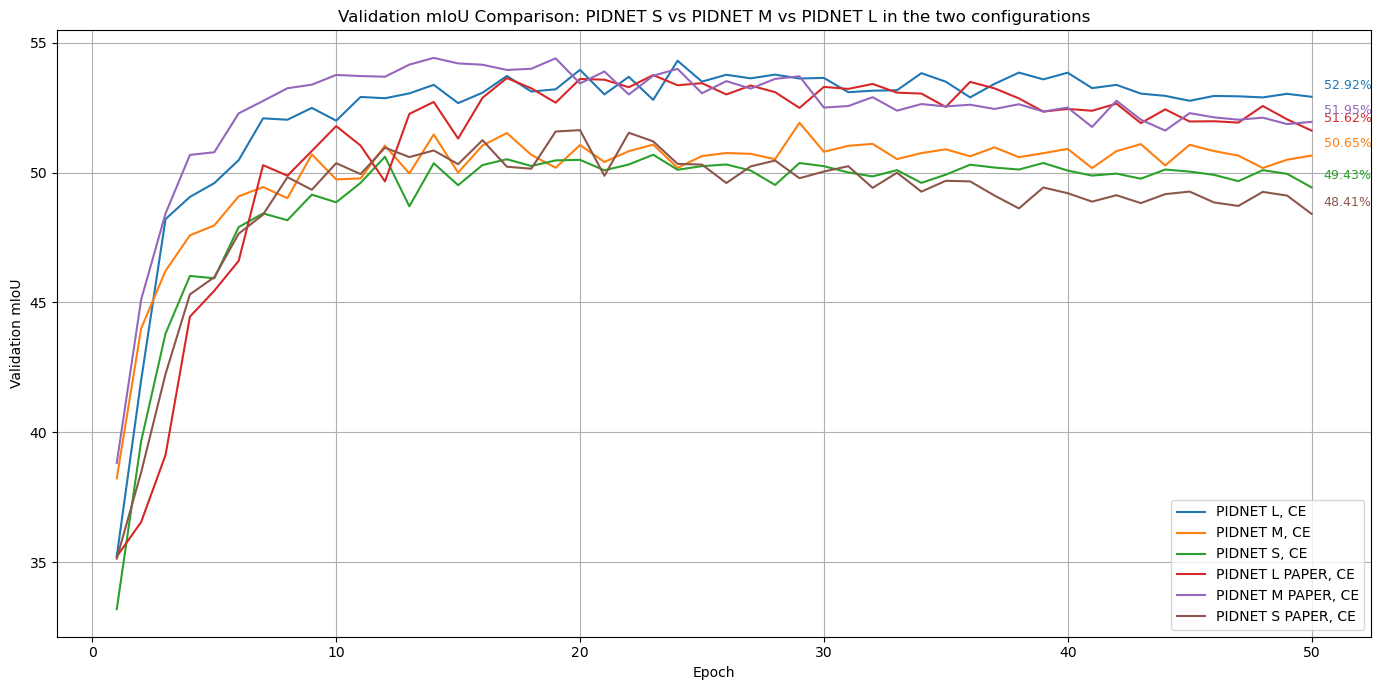

In [3]:


# --- Get last epoch values for text annotation (based on max epoch) ---
last_l = df_pidnet_l.loc[df_pidnet_l['epoch'].idxmax()]
last_m = df_pidnet_m.loc[df_pidnet_m['epoch'].idxmax()]
last_s = df_pidnet_s.loc[df_pidnet_s['epoch'].idxmax()]

last_l_paper = df_pidnet_l_paper.loc[df_pidnet_l_paper['epoch'].idxmax()]
last_s_paper = df_pidnet_s_paper.loc[df_pidnet_s_paper['epoch'].idxmax()]
last_m_paper = df_pidnet_m_paper.loc[df_pidnet_m_paper['epoch'].idxmax()]

# --- Plot ---
plt.figure(figsize=(14, 7))

# Plot the mIoU curves
line_l, = plt.plot(df_pidnet_l['epoch'], df_pidnet_l['val_mIoU'], label='PIDNET L, CE')
line_m, = plt.plot(df_pidnet_m['epoch'], df_pidnet_m['val_mIoU'], label='PIDNET M, CE')
line_s, = plt.plot(df_pidnet_s['epoch'], df_pidnet_s['val_mIoU'], label='PIDNET S, CE')

line_l_paper, = plt.plot(df_pidnet_l_paper['epoch'], df_pidnet_l_paper['val_mIoU'], label='PIDNET L PAPER, CE')
line_m_paper, = plt.plot(df_pidnet_m_paper['epoch'], df_pidnet_m_paper['val_mIoU'], label='PIDNET M PAPER, CE')
line_s_paper, = plt.plot(df_pidnet_s_paper['epoch'], df_pidnet_s_paper['val_mIoU'], label='PIDNET S PAPER, CE')

# --- Annotate final mIoU values ---
text_offset_x = 0.5
text_offset_y = 0.2  # piccolo offset verticale per il testo

plt.text(last_l['epoch'] + text_offset_x, last_l['val_mIoU'] + text_offset_y, f"{last_l['val_mIoU']:.2f}%",
         color=line_l.get_color(), ha='left', va='bottom', fontsize=9)

plt.text(last_m['epoch'] + text_offset_x, last_m['val_mIoU'] + text_offset_y, f"{last_m['val_mIoU']:.2f}%",
         color=line_m.get_color(), ha='left', va='bottom', fontsize=9)

plt.text(last_s['epoch'] + text_offset_x, last_s['val_mIoU'] + text_offset_y, f"{last_s['val_mIoU']:.2f}%",
         color=line_s.get_color(), ha='left', va='bottom', fontsize=9)

plt.text(last_l_paper['epoch'] + text_offset_x, last_l_paper['val_mIoU'] + text_offset_y, f"{last_l_paper['val_mIoU']:.2f}%",
         color=line_l_paper.get_color(), ha='left', va='bottom', fontsize=9)

plt.text(last_m_paper['epoch'] + text_offset_x, last_m_paper['val_mIoU'] + text_offset_y, f"{last_m_paper['val_mIoU']:.2f}%",
         color=line_m_paper.get_color(), ha='left', va='bottom', fontsize=9)

plt.text(last_s_paper['epoch'] + text_offset_x, last_s_paper['val_mIoU'] + text_offset_y, f"{last_s_paper['val_mIoU']:.2f}%",
         color=line_s_paper.get_color(), ha='left', va='bottom', fontsize=9)

# --- Styling ---
plt.xlabel('Epoch')
plt.ylabel('Validation mIoU')
plt.title('Validation mIoU Comparison: PIDNET S vs PIDNET M vs PIDNET L in the two configurations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


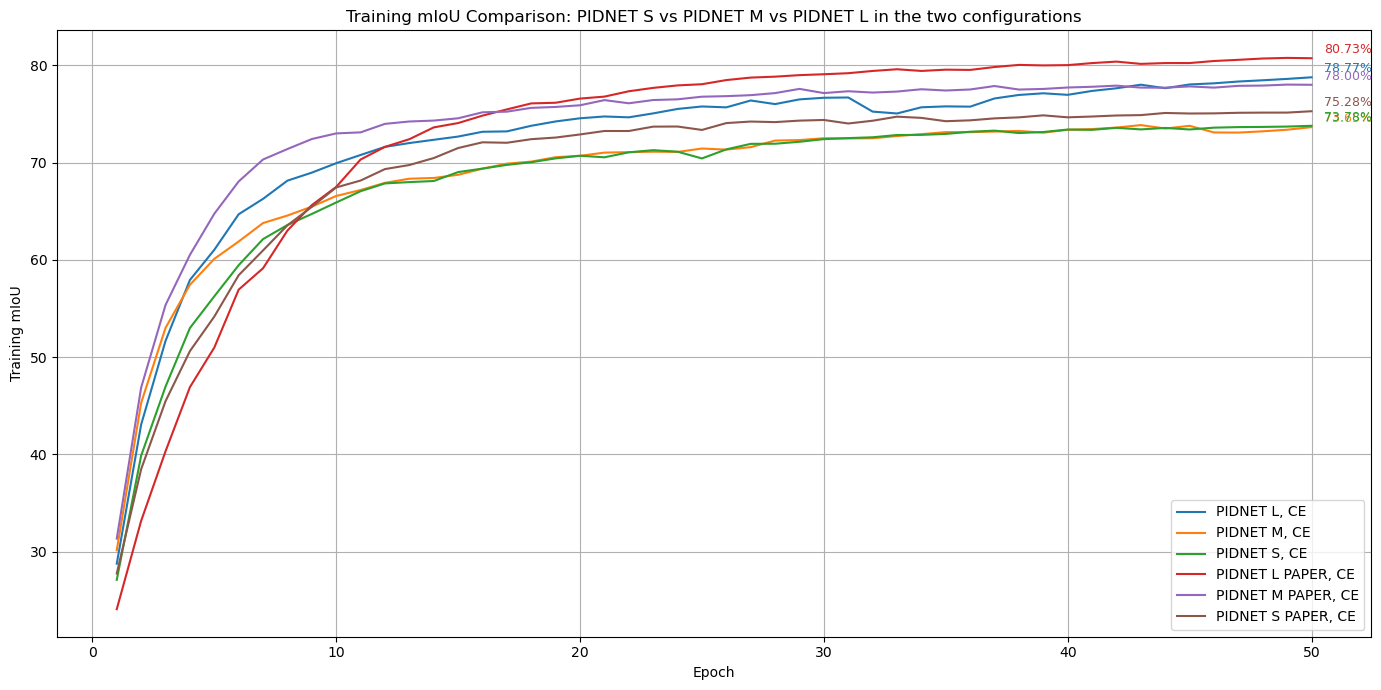

In [4]:

# --- Get last epoch values for text annotation (based on max epoch) ---
last_l = df_pidnet_l.loc[df_pidnet_l['epoch'].idxmax()]
last_m = df_pidnet_m.loc[df_pidnet_m['epoch'].idxmax()]
last_s = df_pidnet_s.loc[df_pidnet_s['epoch'].idxmax()]

last_l_paper = df_pidnet_l_paper.loc[df_pidnet_l_paper['epoch'].idxmax()]
last_s_paper = df_pidnet_s_paper.loc[df_pidnet_s_paper['epoch'].idxmax()]
last_m_paper = df_pidnet_m_paper.loc[df_pidnet_m_paper['epoch'].idxmax()]

# --- Plot ---
plt.figure(figsize=(14, 7))

# Plot the train mIoU curves
line_l, = plt.plot(df_pidnet_l['epoch'], df_pidnet_l['train_mIoU'], label='PIDNET L, CE')
line_m, = plt.plot(df_pidnet_m['epoch'], df_pidnet_m['train_mIoU'], label='PIDNET M, CE')
line_s, = plt.plot(df_pidnet_s['epoch'], df_pidnet_s['train_mIoU'], label='PIDNET S, CE')

line_l_paper, = plt.plot(df_pidnet_l_paper['epoch'], df_pidnet_l_paper['train_mIoU'], label='PIDNET L PAPER, CE')
line_m_paper, = plt.plot(df_pidnet_m_paper['epoch'], df_pidnet_m_paper['train_mIoU'], label='PIDNET M PAPER, CE')
line_s_paper, = plt.plot(df_pidnet_s_paper['epoch'], df_pidnet_s_paper['train_mIoU'], label='PIDNET S PAPER, CE')

# --- Annotate final train mIoU values ---
text_offset_x = 0.5
text_offset_y = 0.2  # piccolo offset verticale per il testo

plt.text(last_l['epoch'] + text_offset_x, last_l['train_mIoU'] + text_offset_y, f"{last_l['train_mIoU']:.2f}%",
         color=line_l.get_color(), ha='left', va='bottom', fontsize=9)

plt.text(last_m['epoch'] + text_offset_x, last_m['train_mIoU'] + text_offset_y, f"{last_m['train_mIoU']:.2f}%",
         color=line_m.get_color(), ha='left', va='bottom', fontsize=9)

plt.text(last_s['epoch'] + text_offset_x, last_s['train_mIoU'] + text_offset_y, f"{last_s['train_mIoU']:.2f}%",
         color=line_s.get_color(), ha='left', va='bottom', fontsize=9)

plt.text(last_l_paper['epoch'] + text_offset_x, last_l_paper['train_mIoU'] + text_offset_y, f"{last_l_paper['train_mIoU']:.2f}%",
         color=line_l_paper.get_color(), ha='left', va='bottom', fontsize=9)

plt.text(last_m_paper['epoch'] + text_offset_x, last_m_paper['train_mIoU'] + text_offset_y, f"{last_m_paper['train_mIoU']:.2f}%",
         color=line_m_paper.get_color(), ha='left', va='bottom', fontsize=9)

plt.text(last_s_paper['epoch'] + text_offset_x, last_s_paper['train_mIoU'] + text_offset_y, f"{last_s_paper['train_mIoU']:.2f}%",
         color=line_s_paper.get_color(), ha='left', va='bottom', fontsize=9)

# --- Styling ---
plt.xlabel('Epoch')
plt.ylabel('Training mIoU')
plt.title('Training mIoU Comparison: PIDNET S vs PIDNET M vs PIDNET L in the two configurations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### NON OVERFITTA TROPPO.

##### Confronto PIDNET S (DATI PAPER) variando batch size.

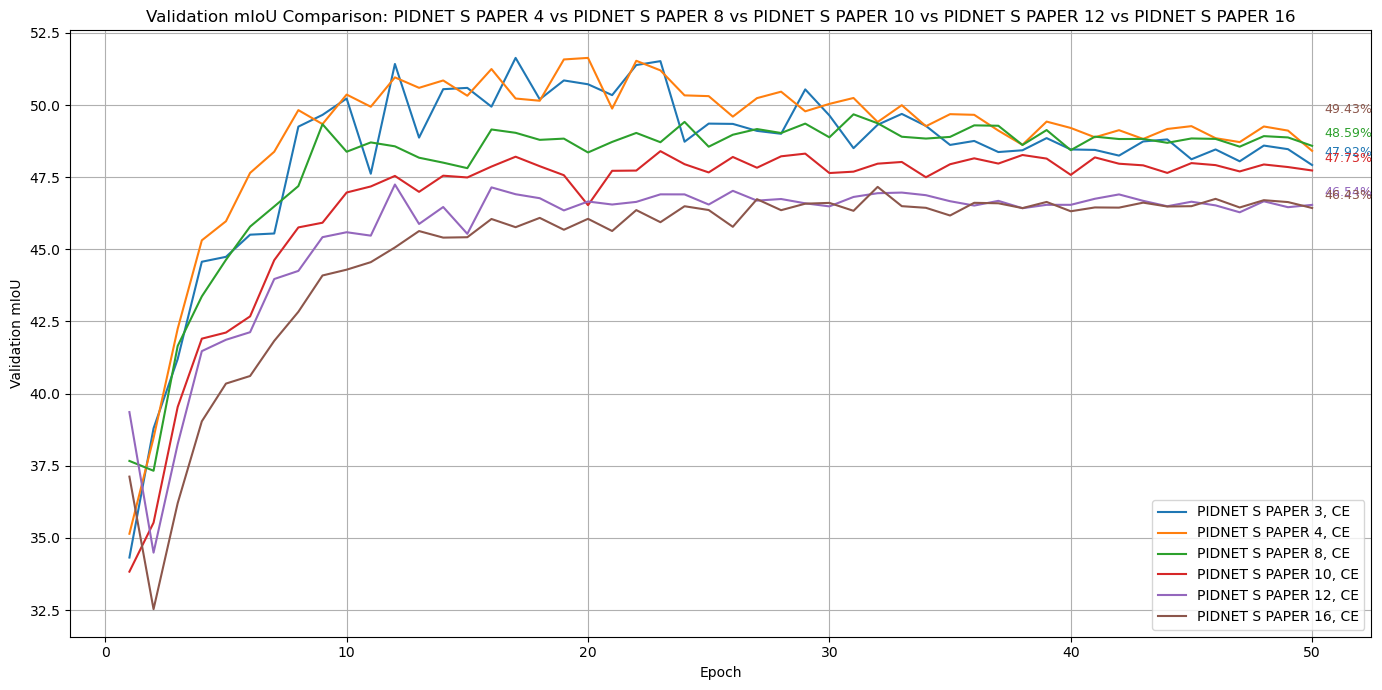

In [5]:
df_pidnet_s_paper_3 = pd.read_csv("pidnet_results/5_PIDNET_S_1ce_0.00625_totloss_samepaper_batch_3_100_percent.csv")
df_pidnet_s_paper = pd.read_csv("pidnet_results/5_PIDNET_S_1ce_0.00625_totloss_samepaper_100_percent.csv")
df_pidnet_s_paper_8 = pd.read_csv("pidnet_results/5_PIDNET_S_1ce_0.00625_totloss_samepaper_batch_8_100_percent.csv")
df_pidnet_s_paper_10 = pd.read_csv("pidnet_results/5_PIDNET_S_1ce_0.00625_totloss_samepaper_batch_10_100_percent.csv")
df_pidnet_s_paper_12 = pd.read_csv("pidnet_results/5_PIDNET_S_1ce_0.00625_totloss_samepaper_batch_12_100_percent.csv")
df_pidnet_s_paper_16 = pd.read_csv("pidnet_results/5_PIDNET_S_1ce_0.00625_totloss_samepaper_batch_16_100_percent.csv")
# --- Get last epoch values for text annotation (based on max epoch) ---
last_s_paper_3 = df_pidnet_s_paper_3.loc[df_pidnet_s_paper_3['epoch'].idxmax()]
last_s_paper_4 = df_pidnet_s.loc[df_pidnet_s['epoch'].idxmax()]
last_s_paper_8 = df_pidnet_s_paper_8.loc[df_pidnet_s_paper_8['epoch'].idxmax()]
last_s_paper_10 = df_pidnet_s_paper_10.loc[df_pidnet_s_paper_10['epoch'].idxmax()]      
last_s_paper_12 = df_pidnet_s_paper_12.loc[df_pidnet_s_paper_12['epoch'].idxmax()]
last_s_paper_16 = df_pidnet_s_paper_16.loc[df_pidnet_s_paper_16['epoch'].idxmax()]
# --- Plot ---
plt.figure(figsize=(14, 7)) 
# Plot the val mIoU curves
line_s_paper_3, = plt.plot(df_pidnet_s_paper_3['epoch'], df_pidnet_s_paper_3['val_mIoU'], label='PIDNET S PAPER 3, CE')
line_s_paper_4, = plt.plot(df_pidnet_s_paper['epoch'], df_pidnet_s_paper['val_mIoU'], label='PIDNET S PAPER 4, CE')
line_s_paper_8, = plt.plot(df_pidnet_s_paper_8['epoch'], df_pidnet_s_paper_8['val_mIoU'], label='PIDNET S PAPER 8, CE')    
line_s_paper_10, = plt.plot(df_pidnet_s_paper_10['epoch'], df_pidnet_s_paper_10['val_mIoU'], label='PIDNET S PAPER 10, CE')
line_s_paper_12, = plt.plot(df_pidnet_s_paper_12['epoch'], df_pidnet_s_paper_12['val_mIoU'], label='PIDNET S PAPER 12, CE')
line_s_paper_16, = plt.plot(df_pidnet_s_paper_16['epoch'], df_pidnet_s_paper_16['val_mIoU'], label='PIDNET S PAPER 16, CE')

# --- Annotate final val mIoU values ---
text_offset_x = 0.5
text_offset_y = 0.2  # piccolo offset verticale per il testo
plt.text(last_s_paper_3['epoch'] + text_offset_x, last_s_paper_3['val_mIoU'] + text_offset_y, f"{last_s_paper_3['val_mIoU']:.2f}%",
         color=line_s_paper_3.get_color(), ha='left', va='bottom', fontsize=9)
plt.text(last_s_paper_4['epoch'] + text_offset_x, last_s_paper_4['val_mIoU'] + text_offset_y, f"{last_s_paper_4['val_mIoU']:.2f}%",
         color=line_s_paper.get_color(), ha='left', va='bottom', fontsize=9)
plt.text(last_s_paper_8['epoch'] + text_offset_x, last_s_paper_8['val_mIoU'] + text_offset_y, f"{last_s_paper_8['val_mIoU']:.2f}%",
            color=line_s_paper_8.get_color(), ha='left', va='bottom', fontsize=9)
plt.text(last_s_paper_10['epoch'] + text_offset_x, last_s_paper_10['val_mIoU'] + text_offset_y, f"{last_s_paper_10['val_mIoU']:.2f}%",
            color=line_s_paper_10.get_color(), ha='left', va='bottom', fontsize=9)
plt.text(last_s_paper_12['epoch'] + text_offset_x, last_s_paper_12['val_mIoU'] + text_offset_y, f"{last_s_paper_12['val_mIoU']:.2f}%",
            color=line_s_paper_12.get_color(), ha='left', va='bottom', fontsize=9)  
plt.text(last_s_paper_16['epoch'] + text_offset_x, last_s_paper_16['val_mIoU'] + text_offset_y, f"{last_s_paper_16['val_mIoU']:.2f}%",
            color=line_s_paper_16.get_color(), ha='left', va='bottom', fontsize=9)
# --- Styling ---
plt.xlabel('Epoch')
plt.ylabel('Validation mIoU')
plt.title('Validation mIoU Comparison: PIDNET S PAPER 4 vs PIDNET S PAPER 8 vs PIDNET S PAPER 10 vs PIDNET S PAPER 12 vs PIDNET S PAPER 16')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



#### TRY WITH DROPOUT PIDNET S PAPER WITH LR 0.00625, batch size 4, ce , same lambda as paper

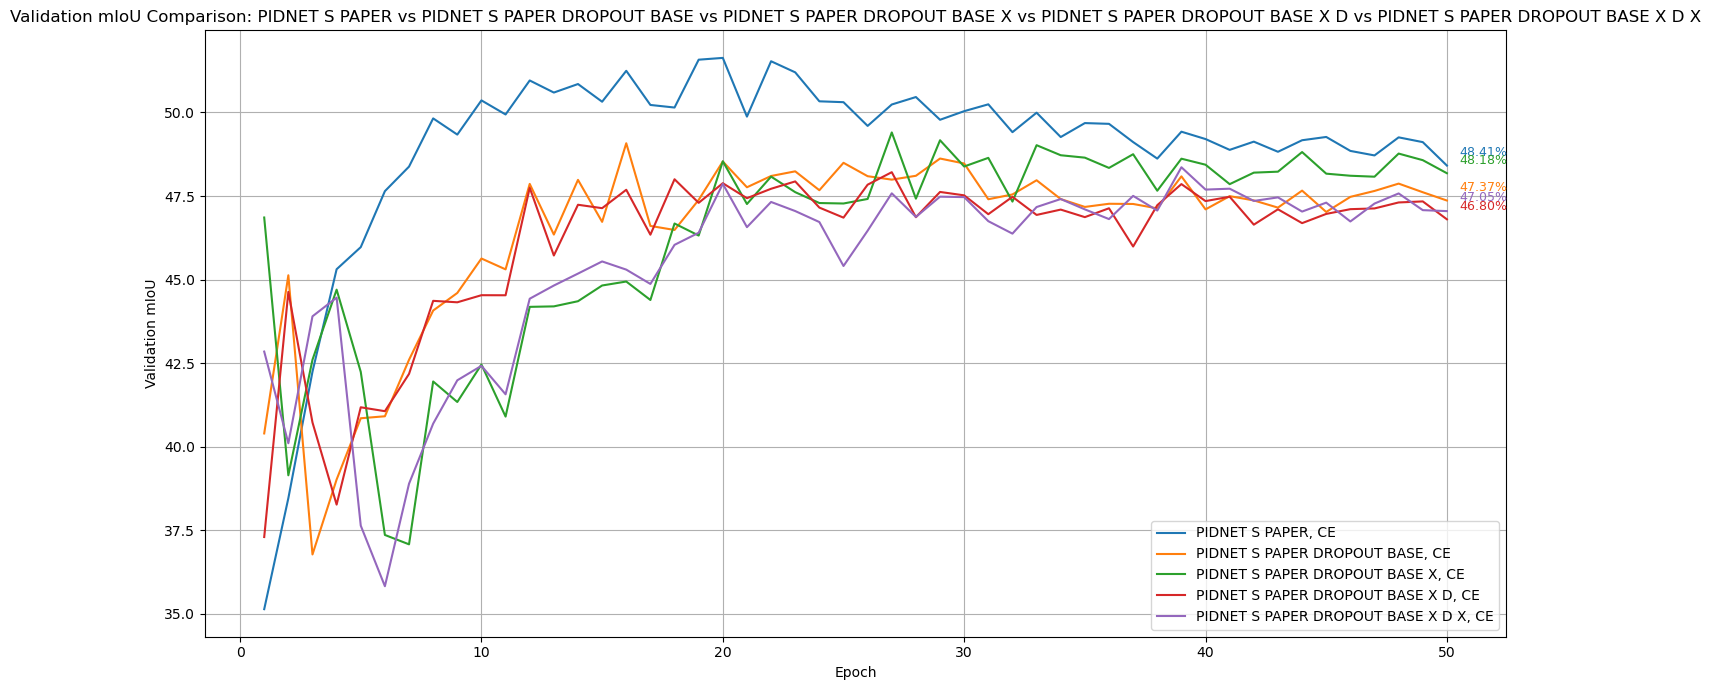

In [6]:
df_pidnet_s= pd.read_csv("pidnet_results/5_PIDNET_S_1ce_0.00625_totloss_samepaper_100_percent.csv")
df_pidnet_s_dropout_base = pd.read_csv("pidnet_results/5_PIDNET_S_1ce_0.00625_totloss_samepaper_dropout_base_100_percent.csv")
df_pidnet_s_dropout_base_x = pd.read_csv("pidnet_results/5_PIDNET_S_1ce_0.00625_totloss_samepaper_dropout_base_x_100_percent.csv")
df_pidnet_s_dropout_base_x_d = pd.read_csv("pidnet_results/5_PIDNET_S_1ce_0.00625_totloss_samepaper_dropout_base_x_d_100_percent.csv")
df_pidnet_s_dropout_base_x_d_x = pd.read_csv("pidnet_results/5_PIDNET_S_1ce_0.00625_totloss_samepaper_dropout_base_x_d_x_100_percent.csv")
# --- Get last epoch values for text annotation (based on max epoch) ---
last_s = df_pidnet_s.loc[df_pidnet_s['epoch'].idxmax()]
last_s_dropout_base = df_pidnet_s_dropout_base.loc[df_pidnet_s_dropout_base['epoch'].idxmax()]
last_s_dropout_base_x = df_pidnet_s_dropout_base_x.loc[df_pidnet_s_dropout_base_x['epoch'].idxmax()]
last_s_dropout_base_x_d = df_pidnet_s_dropout_base_x_d.loc[df_pidnet_s_dropout_base_x_d['epoch'].idxmax()]
last_s_dropout_base_x_d_x = df_pidnet_s_dropout_base_x_d_x.loc[df_pidnet_s_dropout_base_x_d_x['epoch'].idxmax()]
# --- Plot ---
plt.figure(figsize=(14, 7))
# Plot the val mIoU curves
line_s, = plt.plot(df_pidnet_s['epoch'], df_pidnet_s['val_mIoU'], label='PIDNET S PAPER, CE')
line_s_dropout_base, = plt.plot(df_pidnet_s_dropout_base['epoch'], df_pidnet_s_dropout_base['val_mIoU'], label='PIDNET S PAPER DROPOUT BASE, CE')
line_s_dropout_base_x, = plt.plot(df_pidnet_s_dropout_base_x['epoch'], df_pidnet_s_dropout_base_x['val_mIoU'], label='PIDNET S PAPER DROPOUT BASE X, CE')
line_s_dropout_base_x_d, = plt.plot(df_pidnet_s_dropout_base_x_d['epoch'], df_pidnet_s_dropout_base_x_d['val_mIoU'], label='PIDNET S PAPER DROPOUT BASE X D, CE')
line_s_dropout_base_x_d_x, = plt.plot(df_pidnet_s_dropout_base_x_d_x['epoch'], df_pidnet_s_dropout_base_x_d_x['val_mIoU'], label='PIDNET S PAPER DROPOUT BASE X D X, CE')
# --- Annotate final val mIoU values ---
text_offset_x = 0.5
text_offset_y = 0.2  # piccolo offset verticale per il testo
plt.text(last_s['epoch'] + text_offset_x, last_s['val_mIoU'] + text_offset_y, f"{last_s['val_mIoU']:.2f}%",
         color=line_s.get_color(), ha='left', va='bottom', fontsize=9)
plt.text(last_s_dropout_base['epoch'] + text_offset_x, last_s_dropout_base['val_mIoU'] + text_offset_y, f"{last_s_dropout_base['val_mIoU']:.2f}%",
            color=line_s_dropout_base.get_color(), ha='left', va='bottom', fontsize=9)
plt.text(last_s_dropout_base_x['epoch'] + text_offset_x, last_s_dropout_base_x['val_mIoU'] + text_offset_y, f"{last_s_dropout_base_x['val_mIoU']:.2f}%",
            color=line_s_dropout_base_x.get_color(), ha='left', va='bottom', fontsize=9)
plt.text(last_s_dropout_base_x_d['epoch'] + text_offset_x, last_s_dropout_base_x_d['val_mIoU'] + text_offset_y, f"{last_s_dropout_base_x_d['val_mIoU']:.2f}%",
            color=line_s_dropout_base_x_d.get_color(), ha='left', va='bottom', fontsize=9)  
plt.text(last_s_dropout_base_x_d_x['epoch'] + text_offset_x, last_s_dropout_base_x_d_x['val_mIoU'] + text_offset_y, f"{last_s_dropout_base_x_d_x['val_mIoU']:.2f}%",
            color=line_s_dropout_base_x_d_x.get_color(), ha='left', va='bottom', fontsize=9)
# --- Styling ---
plt.xlabel('Epoch')
plt.ylabel('Validation mIoU')
plt.title('Validation mIoU Comparison: PIDNET S PAPER vs PIDNET S PAPER DROPOUT BASE vs PIDNET S PAPER DROPOUT BASE X vs PIDNET S PAPER DROPOUT BASE X D vs PIDNET S PAPER DROPOUT BASE X D X')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




#### DI NUOVO, IL MIGLIORE SENZA DROPOUT.

### ORA PROVO I TRE PIDNET CON LAMBDA1 CHE HA DECADIMENTO:
lambda_1 = 20* (0.9 ** (epoch / 10))

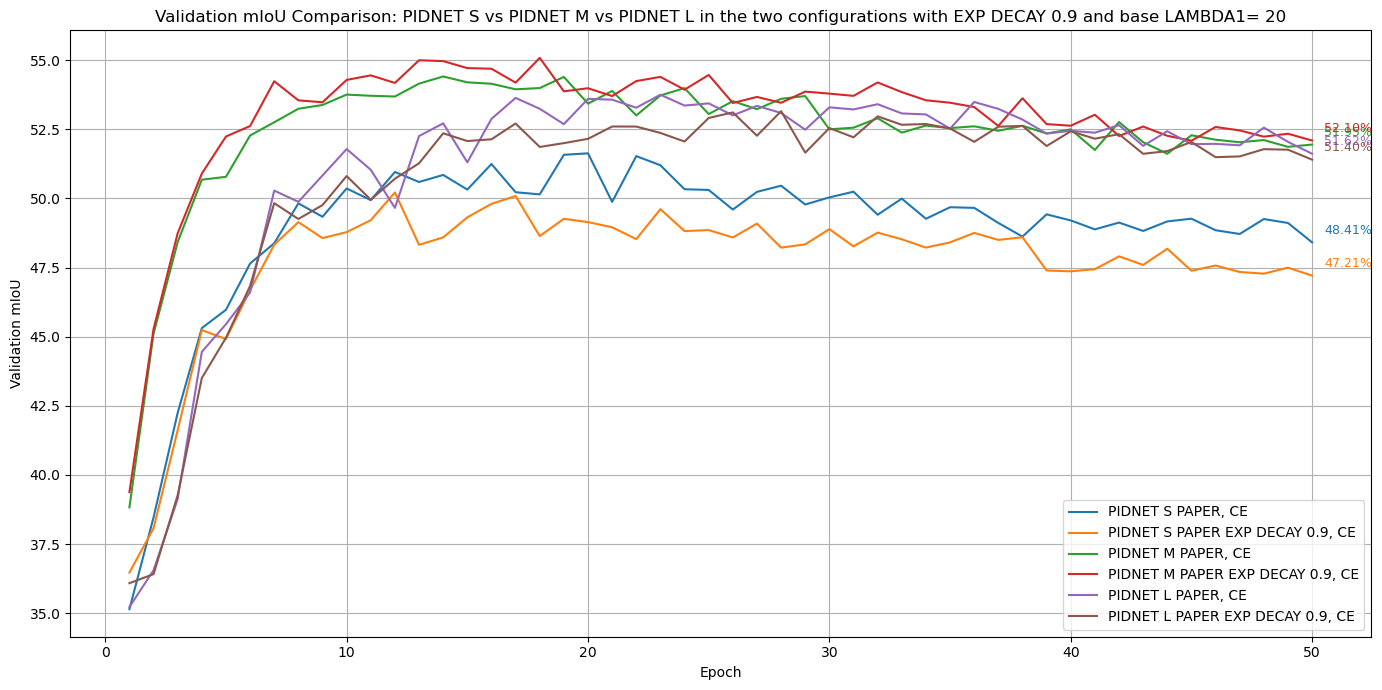

In [7]:
df_pidnet_s= pd.read_csv("pidnet_results/5_PIDNET_S_1ce_0.00625_totloss_samepaper_100_percent.csv")
df_pidnet_s_decay_09 = pd.read_csv("pidnet_results/5_PIDNET_S_1ce_0.00625_totloss_exp_decay_0.9_lambda1_100_percent.csv")

df_pidnet_m= pd.read_csv("pidnet_results/5_PIDNET_M_1ce_0.00625_totloss_samepaper_100_percent.csv")
df_pidnet_m_decay_09 = pd.read_csv("pidnet_results/5_PIDNET_M_1ce_0.00625_totloss_exp_decay_0.9_lambda1_100_percent.csv")

df_pidnet_l= pd.read_csv("pidnet_results/5_PIDNET_L_1ce_0.00625_totloss_samepaper_100_percent.csv")
df_pidnet_l_decay_09 = pd.read_csv("pidnet_results/5_PIDNET_L_1ce_0.00625_totloss_exp_decay_0.9_lambda1_100_percent.csv")
# --- Get last epoch values for text annotation (based on max epoch) ---
last_s = df_pidnet_s.loc[df_pidnet_s['epoch'].idxmax()]
last_s_decay_09 = df_pidnet_s_decay_09.loc[df_pidnet_s_decay_09['epoch'].idxmax()]
last_m = df_pidnet_m.loc[df_pidnet_m['epoch'].idxmax()]
last_m_decay_09 = df_pidnet_m_decay_09.loc[df_pidnet_m_decay_09['epoch'].idxmax()]
last_l = df_pidnet_l.loc[df_pidnet_l['epoch'].idxmax()]
last_l_decay_09 = df_pidnet_l_decay_09.loc[df_pidnet_l_decay_09['epoch'].idxmax()]
# --- Plot ---
plt.figure(figsize=(14, 7))
# Plot the val mIoU curves
line_s, = plt.plot(df_pidnet_s['epoch'], df_pidnet_s['val_mIoU'], label='PIDNET S PAPER, CE')   
line_s_decay_09, = plt.plot(df_pidnet_s_decay_09['epoch'], df_pidnet_s_decay_09['val_mIoU'], label='PIDNET S PAPER EXP DECAY 0.9, CE')
line_m, = plt.plot(df_pidnet_m['epoch'], df_pidnet_m['val_mIoU'], label='PIDNET M PAPER, CE')
line_m_decay_09, = plt.plot(df_pidnet_m_decay_09['epoch'], df_pidnet_m_decay_09['val_mIoU'], label='PIDNET M PAPER EXP DECAY 0.9, CE')
line_l, = plt.plot(df_pidnet_l['epoch'], df_pidnet_l['val_mIoU'], label='PIDNET L PAPER, CE')
line_l_decay_09, = plt.plot(df_pidnet_l_decay_09['epoch'], df_pidnet_l_decay_09['val_mIoU'], label='PIDNET L PAPER EXP DECAY 0.9, CE')
# --- Annotate final val mIoU values ---
text_offset_x = 0.5
text_offset_y = 0.2  # piccolo offset verticale per il testo
plt.text(last_s['epoch'] + text_offset_x, last_s['val_mIoU'] + text_offset_y, f"{last_s['val_mIoU']:.2f}%",
         color=line_s.get_color(), ha='left', va='bottom', fontsize=9)
plt.text(last_s_decay_09['epoch'] + text_offset_x, last_s_decay_09['val_mIoU'] + text_offset_y, f"{last_s_decay_09['val_mIoU']:.2f}%",
            color=line_s_decay_09.get_color(), ha='left', va='bottom', fontsize=9)
plt.text(last_m['epoch'] + text_offset_x, last_m['val_mIoU'] + text_offset_y, f"{last_m['val_mIoU']:.2f}%",
            color=line_m.get_color(), ha='left', va='bottom', fontsize=9)
plt.text(last_m_decay_09['epoch'] + text_offset_x, last_m_decay_09['val_mIoU'] + text_offset_y, f"{last_m_decay_09['val_mIoU']:.2f}%",
            color=line_m_decay_09.get_color(), ha='left', va='bottom', fontsize=9)
plt.text(last_l['epoch'] + text_offset_x, last_l['val_mIoU'] + text_offset_y, f"{last_l['val_mIoU']:.2f}%",
         color=line_l.get_color(), ha='left', va='bottom', fontsize=9)
plt.text(last_l_decay_09['epoch'] + text_offset_x, last_l_decay_09['val_mIoU'] + text_offset_y, f"{last_l_decay_09['val_mIoU']:.2f}%",
            color=line_l_decay_09.get_color(), ha='left', va='bottom', fontsize=9)
# --- Styling ---
plt.xlabel('Epoch')
plt.ylabel('Validation mIoU')
plt.title('Validation mIoU Comparison: PIDNET S vs PIDNET M vs PIDNET L in the two configurations with EXP DECAY 0.9 and base LAMBDA1= 20')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**PIDNET S**: meglio senza decay

**PIDNET M**: meglio con decay con picco a 17/18 epoche

**PIDNET L** : meglio con decay


ho provato pidnet m decay 0.8, 0.7 ma fa meno bene e passare da lambda1= 20 nelle prime 15 e poi a 1 male. applico warmup alle prime 7 peohce.
provo con poly lr (solito power 0.9) ma lr = 0.01 e 0.001.

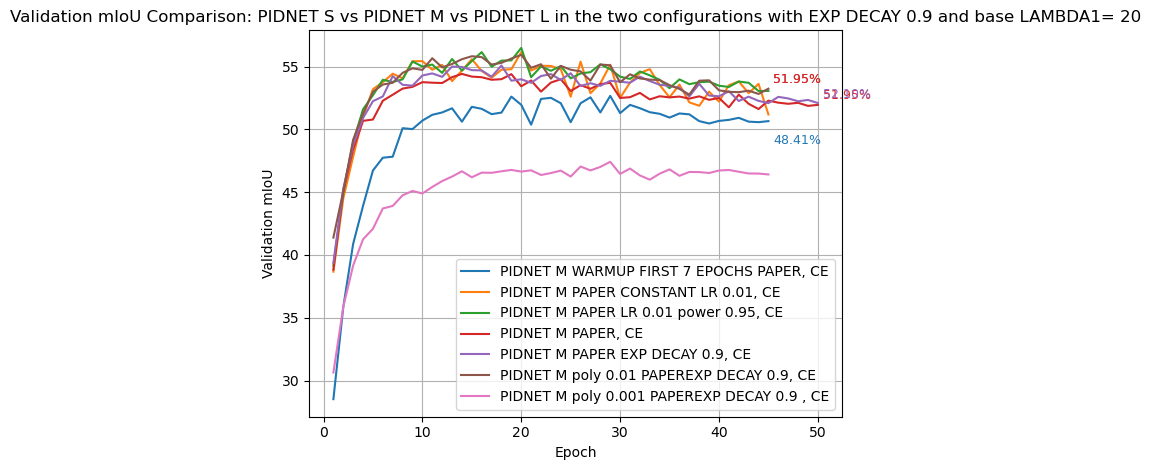

In [9]:
df_pidnet_m_warmup = pd.read_csv("pidnet_results/5_PIDNET_M_1ce_warmup_first7_epochs_0.00625_totloss_exp_decay_0.9_lambda1_100_percent.csv")
df_pidnet_m_lr0_01 = pd.read_csv("pidnet_results/5_PIDNET_M_1ce_0.01_totloss_exp_decay_0.9_lambda1_100_percent.csv")
df_pidnet_m_lr0_001 = pd.read_csv("pidnet_results/5_PIDNET_M_1ce_0.001_totloss_exp_decay_0.9_lambda1_100_percent.csv")
df_pidnet_m_lr_const_0_01 = pd.read_csv("pidnet_results/5_PIDNET_M_1ce_CONSTANTLR_0.01totloss_exp_decay_0.9_lambda1_100_percent.csv")
df_pidnet_m_0_01_power_095 = pd.read_csv("pidnet_results/5_PIDNET_M_1ce_polylr_0.01_power_0.95_totloss_exp_decay_0.9_lambda1_100_percent.csv")

last_m_warmup = df_pidnet_m_warmup.loc[df_pidnet_m_warmup['epoch'].idxmax()]
line_m_warmup, = plt.plot(df_pidnet_m_warmup['epoch'], df_pidnet_m_warmup['val_mIoU'], label='PIDNET M WARMUP FIRST 7 EPOCHS PAPER, CE')
last_m_lr0_01 = df_pidnet_m_lr0_01.loc[df_pidnet_m_lr0_01['epoch'].idxmax()]
last_m_lr0_001 = df_pidnet_m_lr0_01.loc[df_pidnet_m_lr0_001['epoch'].idxmax()]
last_m_lr_const_0_01 = df_pidnet_m_lr_const_0_01.loc[df_pidnet_m_lr_const_0_01['epoch'].idxmax()]
last_m_0_01_power_095 = df_pidnet_m_0_01_power_095.loc[df_pidnet_m_0_01_power_095['epoch'].idxmax()]
line_m_lr_const_0_01 = plt.plot(df_pidnet_m_lr_const_0_01['epoch'], df_pidnet_m_lr_const_0_01['val_mIoU'], label='PIDNET M PAPER CONSTANT LR 0.01, CE')
line_m_lr_0_01_power_095 = plt.plot(df_pidnet_m_0_01_power_095['epoch'], df_pidnet_m_0_01_power_095['val_mIoU'], label='PIDNET M PAPER LR 0.01 power 0.95, CE')


line_m, = plt.plot(df_pidnet_m['epoch'], df_pidnet_m['val_mIoU'], label='PIDNET M PAPER, CE')
line_m_decay_09, = plt.plot(df_pidnet_m_decay_09['epoch'], df_pidnet_m_decay_09['val_mIoU'], label='PIDNET M PAPER EXP DECAY 0.9, CE')
line_m_lr0_01, = plt.plot(df_pidnet_m_lr0_01['epoch'], df_pidnet_m_lr0_01['val_mIoU'], label='PIDNET M poly 0.01 PAPEREXP DECAY 0.9, CE')
line_m_lr0_001, = plt.plot(df_pidnet_m_lr0_001['epoch'], df_pidnet_m_lr0_001['val_mIoU'], label='PIDNET M poly 0.001 PAPEREXP DECAY 0.9 , CE')

text_offset_x = 0.5
text_offset_y = 0.2  # piccolo offset verticale per il testo
plt.text(last_m_warmup['epoch'] + text_offset_x, last_s['val_mIoU'] + text_offset_y, f"{last_s['val_mIoU']:.2f}%",
         color=line_s.get_color(), ha='left', va='bottom', fontsize=9)
plt.text(last_m['epoch'] + text_offset_x, last_m['val_mIoU'] + text_offset_y, f"{last_m['val_mIoU']:.2f}%",
            color=line_m.get_color(), ha='left', va='bottom', fontsize=9)
plt.text(last_m_lr0_01['epoch'] + text_offset_x, last_m_lr0_01['val_mIoU'] + text_offset_y, f"{last_m['val_mIoU']:.2f}%",
            color=line_m.get_color(), ha='left', va='bottom', fontsize=9)
plt.text(last_m_lr0_001['epoch'] + text_offset_x, last_m_lr0_001['val_mIoU'] + text_offset_y, f"{last_m['val_mIoU']:.2f}%",
            color=line_m.get_color(), ha='left', va='bottom', fontsize=9)
plt.text(last_m_decay_09['epoch'] + text_offset_x, last_m_decay_09['val_mIoU'] + text_offset_y, f"{last_m_decay_09['val_mIoU']:.2f}%",
            color=line_m_decay_09.get_color(), ha='left', va='bottom', fontsize=9)
# --- Styling ---
plt.xlabel('Epoch')
plt.ylabel('Validation mIoU')
plt.title('Validation mIoU Comparison: PIDNET S vs PIDNET M vs PIDNET L in the two configurations with EXP DECAY 0.9 and base LAMBDA1= 20')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### quello con lr = 0.01 e power 0.95 e' il migliore